### Name : Mohamed Abdalla
### ID       : 21242062

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_score

### Scatterplot Function

In [130]:
colors = np.array(['orange', 'blue', 'black', 'gray', 'pink', 'green', 'yellow'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [3]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### Task 2
1- Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. <br>
2- Use the Elbow method to pick the best value of k.<br>
3- Attempt also another method for determining the best value of k.<br>
4- Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means.<br>
5- Aim at producing meaningful clustering.<br>
6- Use at least two different methods for visualising the clustering. <br>
7- Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).<br>

In [4]:
# rescale the values in each column to the interval [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

 #### Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k.

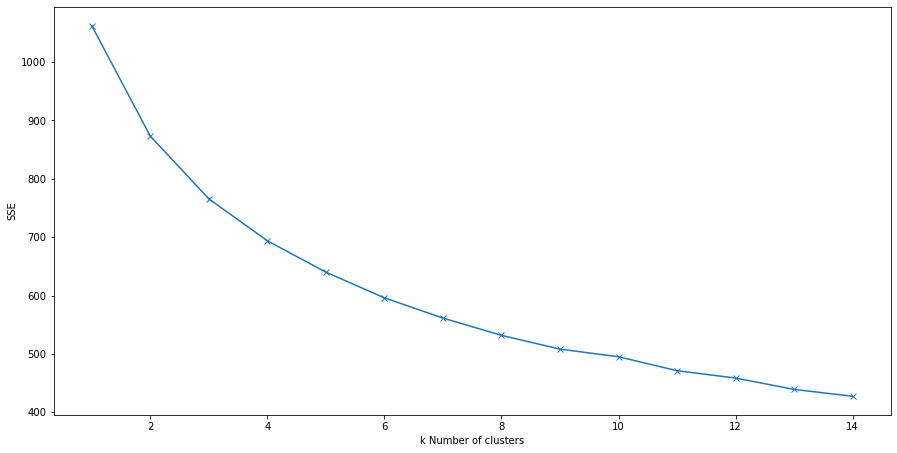

In [31]:
max_clusters = 15
k_mean= list()
inertia = list() 

for k in range(1,max_clusters):
    k_mean.append(cluster.KMeans(n_clusters=k,  init='k-means++', n_init=100, max_iter=1000).fit(data))
    inertia.append(k_mean[k-1].inertia_)

plt.figure(figsize=(15,7.5))
plt.plot(range(1,max_clusters),inertia,'-x')
plt.xlabel("k Number of clusters")
plt.ylabel('SSE')
plt.show()

#### From the ***Elbow*** method:
The Elbow could be seend around k = 2 or 3 clusters.<br>
So, I will chose ***k = 2*** to be optimal using Elbow method.

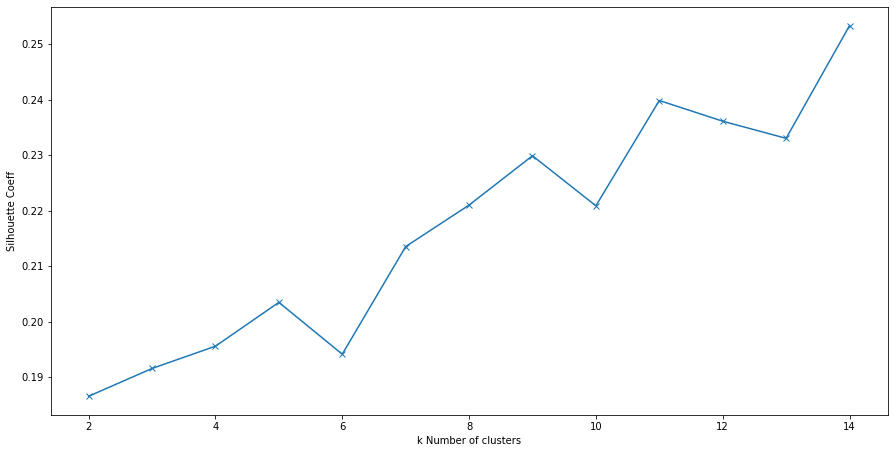

In [32]:
# using Silhouette Coefficient Method to fing best k value
label = list() 
sil_coeff = list()

for k in range(2,max_clusters):
    label.append(k_mean[k-1].labels_)
    sil_coeff.append(silhouette_score(data, label[k-2], metric='euclidean'))


plt.figure(figsize=(15,7.5))
plt.plot(range(2,max_clusters),sil_coeff,'-x')
plt.xlabel("k Number of clusters")
plt.ylabel('Silhouette Coeff')
plt.show()

#### From the ***Silhouette Coefficient*** method:
We can find that Coeff starts to increase as k increase till it reaches k = 5 then start damping "decrease then increase". <br>
I also noticed that by increaising max number of clusters silhouette coeff starts to increase, so I will consider this as overfitting and I will select first max vlaue befor dampping to be the optmum k.<br>
So, From silhouett method I will select ***k = 5*** to be the optimum number of clusters.

####  Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means.

In [62]:
k_opt_elbow = 2
k_opt_sil   = 5
Elbow_index = 1
Sil_index   = 4
K_mean_Elbow = k_mean[Elbow_index]
K_mean_Sil   = k_mean[Sil_index]

#### Use at least two different methods for visualising the clustering

In [63]:
data_and_centers_Elbow = np.r_[data,K_mean_Elbow.cluster_centers_]
data_and_centers_Sil   = np.r_[data,K_mean_Sil.cluster_centers_]

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space 
***Elbow***

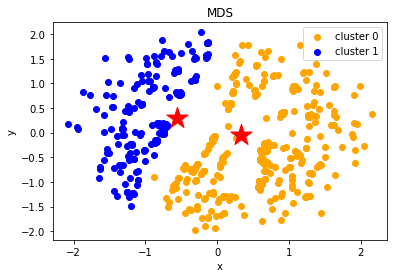

In [52]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers_Elbow)
clustering_scatterplot(points=XYcoordinates[:-k_opt_elbow,:], 
                       labels=K_mean_Elbow.labels_, 
                       centers=XYcoordinates[-k_opt_elbow:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space 
***Elbow***

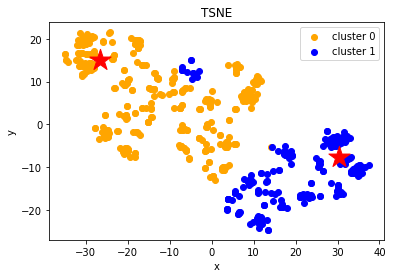

In [53]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers_Elbow)
clustering_scatterplot(points=XYcoordinates[:-k_opt_elbow,:], 
                       labels=K_mean_Elbow.labels_,
                       centers=XYcoordinates[-k_opt_elbow:,:], 
                       title='TSNE')

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space 
***Silhouetter***

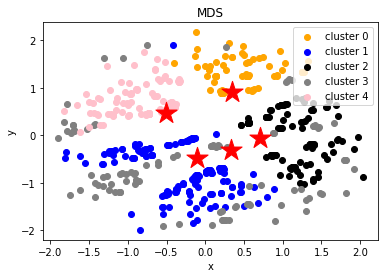

In [64]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers_Sil)
clustering_scatterplot(points=XYcoordinates[:-k_opt_sil,:], 
                       labels=K_mean_Sil.labels_, 
                       centers=XYcoordinates[-k_opt_sil:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space 
***Silhouetter***

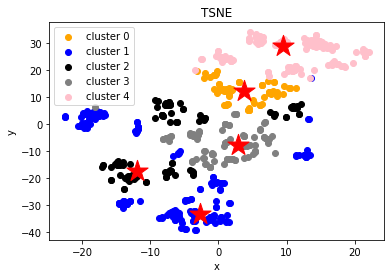

In [65]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers_Sil)
clustering_scatterplot(points=XYcoordinates[:-k_opt_sil,:], 
                       labels=K_mean_Sil.labels_,
                       centers=XYcoordinates[-k_opt_sil:,:], 
                       title='TSNE')

#### Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

##### For Elbow optimum k = 2

In [66]:
df['cluster_Elbow'] = pd.Series(K_mean_Elbow.labels_, index=df.index)

In [67]:
df.groupby('cluster_Elbow').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster_Elbow                                                              
0                0.247594         0.918059    1.074684          0.707152   
1                0.248927         0.914184    1.078738          0.723498   

               Credit_History  Gender_Male  Gender_nan  Married_Yes  \
cluster_Elbow                                                         
0                    0.845144     0.832021    0.018373     0.648294   
1                    0.871245     0.738197    0.025751     0.648069   

               Married_nan  Self_Employed_Yes  Self_Employed_nan  \
cluster_Elbow                                                      
0                 0.002625           0.131234           0.057743   
1                 0.008584           0.137339           0.042918   

               Education_Not Graduate  Property_Area_Semiurban  \
cluster_Elbow                                                    
0                            0.230971                      0.0   
1                            0.197425                      1.0   

               Property_Area_Urban  Loan_Status_Y  TotalIncome  
cluster_Elbow                                                   
0                         0.530184       0.637795     0.869577  
1                         0.000000       0.768240     0.851417

***Conclusion*** From Elbow optimum value k = 2, K-mean clustered the data into 2 clusters mainly based on property Area. <br>
We can see that cluster 0 examples are mainly in Urban area. <br>
And cluster 1 are mainly in Semiurban area.

##### For Silhouette optimum k = 5

In [68]:
df['cluster_Sil'] = pd.Series(K_mean_Sil.labels_, index=df.index)

In [69]:
df.groupby('cluster_Sil').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster_Sil                                                              
0              0.102564         0.926189    1.002913          0.721474   
1              0.355072         0.938893    1.122059          0.690217   
2              0.078261         0.876531    0.994480          0.735870   
3              0.277778         0.906278    1.084617          0.713725   
4              0.308642         0.922554    1.119394          0.720741   

             Credit_History  Gender_Male  Gender_nan  Married_Yes  \
cluster_Sil                                                         
0                  0.897436     0.525641    0.025641      0.00000   
1                  0.994565     0.945652    0.021739      1.00000   
2                  0.991304     0.643478    0.008696      0.00000   
3                  0.245098     0.843137    0.039216      0.77451   
4                  0.985185     0.844444    0.014815      1.00000   

             Married_nan  Self_Employed_Yes  Self_Employed_nan  \
cluster_Sil                                                      
0               0.025641           0.166667           0.064103   
1               0.000000           0.141304           0.065217   
2               0.008696           0.104348           0.078261   
3               0.000000           0.127451           0.019608   
4               0.000000           0.133333           0.029630   

             Education_Not Graduate  Property_Area_Semiurban  \
cluster_Sil                                                    
0                          0.217949                 1.000000   
1                          0.206522                 0.000000   
2                          0.191304                 0.000000   
3                          0.323529                 0.196078   
4                          0.177778                 1.000000   

             Property_Area_Urban  Loan_Status_Y  TotalIncome  cluster_Elbow  
cluster_Sil                                                                  
0                       0.000000       0.743590     0.787285       1.000000  
1                       0.614130       0.885870     0.922519       0.000000  
2                       0.513043       0.686957     0.787636       0.000000  
3                       0.294118       0.009804     0.848243       0.196078  
4                       0.000000       0.896296     0.899543       1.000000

***Conclusion*** From Silhouette optimum value k = 5, K-mean clustered the data into 5 clusters mainly based on marriage status, property area dependents and loan status. <br>
Cluster 0, have small  number of dependents, not married, living in semurban areas, med chance to get the loan <br>
Cluster 1, have large  number of dependents,     married, living in    urban areas, high chance to get the loan<br>
Cluster 2, have small  number of dependents, not married, living in    urban areas, med chance to get the loan<br>
Cluster 3, have medium number of dependents,     married, living in both     areas, low chance to get the loan<br>
Cluster 4, have medium number of dependents,     married, living in    urban areas, high chance to get the loan<br>

### Task 3
1- Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it. <br>
2- Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

In [116]:
df_1 = pd.read_csv("./loans_train_prepared-1.csv")
data_1 = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [165]:
clustering  = cluster.MeanShift(bandwidth=2).fit(data_1)
num_clusters = len(np.unique(clustering.labels_))
print(np.unique(clustering.labels_),num_clusters)
data_1_and_centers= np.r_[data_1,clustering.cluster_centers_]

[0 1 2 3 4] 5


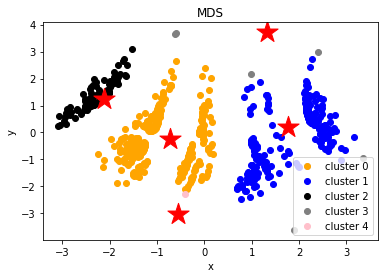

In [166]:
XYcord = manifold.MDS(n_components=2).fit_transform(data_1_and_centers)
clustering_scatterplot(points=XYcord[:-num_clusters,:], 
                       labels=clustering.labels_, 
                       centers=XYcord[-num_clusters:,:], 
                       title='MDS')

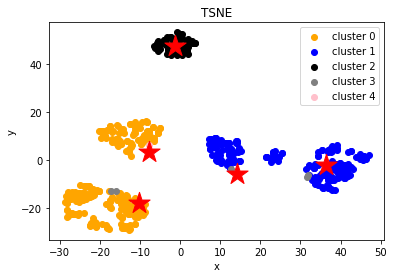

In [167]:
XYcord = manifold.TSNE(n_components=2).fit_transform(data_1_and_centers)
clustering_scatterplot(points=XYcord[:-num_clusters,:], 
                       labels=clustering.labels_, 
                       centers=XYcord[-num_clusters:,:], 
                       title='TSNE')

In [160]:
df_1['cluster'] = pd.Series(clustering.labels_, index=df_1.index)
df_1.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.245198         0.904942    1.062957          0.710169   
1          0.290415         0.885704    1.088864          0.718777   
2          0.102564         0.926189    1.002913          0.721474   
3          0.555556         2.777527    2.106756          0.604167   
4          0.500000         0.275265    1.327499          0.562500   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.993220     0.833898    0.013559     0.616949     0.003390   
1              0.669528     0.841202    0.025751     0.901288     0.000000   
2              0.897436     0.525641    0.025641     0.000000     0.025641   
3              0.666667     0.833333    0.166667     1.000000     0.000000   
4              1.000000     0.500000    0.000000     0.000000     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.128814           0.064407                0.203390   
1                 0.133047           0.025751                0.244635   
2                 0.166667           0.064103                0.217949   
3                 0.000000           0.166667                0.000000   
4                 0.000000           0.500000                0.000000   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                       0.000000             0.569492       0.813559   
1                       0.656652             0.128755       0.519313   
2                       1.000000             0.000000       0.743590   
3                       0.333333             0.333333       0.500000   
4                       0.000000             1.000000       0.000000   

         TotalIncome  
cluster               
0           0.846071  
1           0.848829  
2           0.787285  
3           2.653735  
4           2.495173

***Conclustion:*** <br>
I used MeanShift clustering to compare it with Kmean.<br>
Unlike kmean, MeanShift clustering generate uneven clusters size with non-flat geometry. <br>
But both clustering algorithms mainly based on Distances between points. <br>
MeanShift clustering calculate number of clusters based on bandwidth input parameter, not like kmean which take number of clusters as input parameter.<br>
High values of bandwidth result in small number of clusters and decreasing the bandwidth result in many clusters.<br>
***From the MeanShitft plots*** we can see that clusters size is not even. Mainly cluster 3 and 4 have very low number of elements inside.